# Combinatorics

*"Counting is the religion of this generation... Anybody can count..." -- Gertrude Stein*

For fair experiments with a finite sample space $S$, we used Axiom III of the Axioms of Probability to show that the probability of an event $E$ is simply

$$
P(E) = \frac{|E|}{|S|}
$$

Thus, the problem of calculating $P(E)$ is simplified to counting the cardinalities of $S$ and $E$. As most people have learned to count as young children, this sounds like a simple exercise. However, in practice, this is often quite challenging. In fact, this general problem space is rich enough that this branch of mathematics has its own name:

````{panels}
DEFINTION
^^^
combinatorics:
*Combinatorics* is the mathematics of counting. 
````

For the data science topics covered in this book, we do not have to deal with many very challenging counting problems. However, if you look back over the past chapters, you may be discover that several problems have already been introduced that could be solve by counting:
* In Chapter 2, we asked "If you only observe 6 heads on the 20 flips, should you reject the idea that the coin is fair?" We solved this problem via simulating flipping a fair coin 20 times and determining the probability of seeing 6 or fewer heads. However, if we record the ordered Heads and Tails outcomes, this is a fair experiment, and so we could solve for the same probability by counting the number of outcomes with 6 or fewer heads.
* In Chapter 3, we conducted a bootstrap test where we randomly split the data for the 50 US states into two sets of 25. When determining how many random draws we might use, it is useful to know how many ways there are to partition the data in this way. This is a combinatorics problem.
* In {doc}`fair-experiments.ipynb`, the relative frequencies were shown for the sum of two fair 6-sided dice, as used in Monopoly. If we record the ordered set of top faces of the dice, then the set experiment is a fair experiment, and we can calculate the exact probabilities for the sum of the faces using combinatorics.


Note that the first and third examples are both types of combined experiments, which consist of a sequence of subexperiments. Suppose there are $K$ subexperiments, and the sample space for the $i$th subexperiment is $S_i$. Then the sample space for the combined experiment is 

$$
S = \left\{\left. \left(s_0, s_1, \ldots, s_{K-1} \right) \right| s_0 \in S_0, s_1 \in S_1, \ldots s_{K-1} \in S_{K-1} \right\}.
$$

This notation for $S$ is tedious. We introduce the following operator to simplify the notation for the sample space:

````{panels}
DEFINTION
^^^
cartesian product:
The *cartesian product* of two sets $A$ and $B$ is denoted $A \times B$ and is defined by 
$$
A \times B = \{ (a,b) | a \in A \mbox{ and } b \in B\}.
$$
That is, it is the set of all two-tuples with the first element from set $A$ and the second element from set $B$.
````

We can form the sample space for our repeated experiment through repeated application of the Cartesian product to the individual sample spaces:

$$
S= S_0 \times S_1  \times \ldots \times S_{K-1}
$$

## Enumerating Sample Spaces and Events Using IterTools

Let's start by enumerating $S$ and showing how it can be used to calculate probabilities. We will use the Python `itertools` library,  which is distributed as part of standard Python distributions to enumerate $S$. Begin by importing this library:

In [4]:
import itertools

**Example 1: Monopoly Dice**

Consider counting for the Monopoly dice problem. The simulated values for the relative frequencies are shown below:

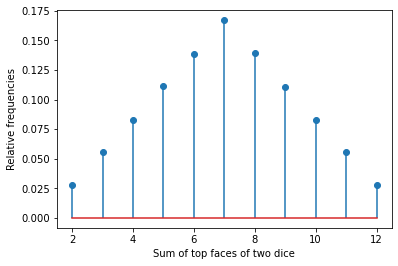

In [35]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt

die1=npr.randint(1, 7, size=1_000_000)
die2=npr.randint(1, 7, size=1_000_000)
dice=die1+die2

vals, counts=np.unique(dice, return_counts=True)
rel_freqs=counts/len(dice)

plt.stem(vals,rel_freqs, use_line_collection=True)
plt.xlabel("Sum of top faces of two dice")
plt.ylabel("Relative frequencies");

 The sample spaces for the two dice are the same. In Python, we can define them using simple ranges:

In [5]:
S0 = range(1,7)
S1 = range(1,7)

The `itertools` library has a `product` function to carry out the Cartesian product over these two ranges:

In [13]:
S= itertools.product( S0, S1 )

In [14]:
for s in S: 
    print(s, ' ', end='')

(1, 1)  (1, 2)  (1, 3)  (1, 4)  (1, 5)  (1, 6)  (2, 1)  (2, 2)  (2, 3)  (2, 4)  (2, 5)  (2, 6)  (3, 1)  (3, 2)  (3, 3)  (3, 4)  (3, 5)  (3, 6)  (4, 1)  (4, 2)  (4, 3)  (4, 4)  (4, 5)  (4, 6)  (5, 1)  (5, 2)  (5, 3)  (5, 4)  (5, 5)  (5, 6)  (6, 1)  (6, 2)  (6, 3)  (6, 4)  (6, 5)  (6, 6)  

```{warning}
Note that the `itertools` functions generally provide an *iterator* to go over the resulting set. Iterators will produce values until exhausted. Unlike looping over a range or list, you cannot execute the loop again using the iterator once it has reached the end. The number of items to be iterated over also cannot be directly determined -- you must iterate over all of the items to determine how many there are.
```

When the number of items being iterated over is small, the iterator can be used to directly create a list of these items:

In [23]:
Slist=list(itertools.product( S0, S1 ))
print(Slist)

[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6)]


As expected from our previous examples, there are 36 items in the sample space:

In [26]:
len(Slist)

36

We can find the probability for the sums of the dice faces by iterating over $S$ and counting the number of times  each sum occurs. It is easy to see that the sum of the faces will be between 2 and 12. We initalize a list with 13 zeros (from 0 to 12) to store the counts.

In [49]:
counts=[0]*13
for s in Slist:
    counts[sum(s)]+=1

print("sum:", "# ways of occurring")
for c in range(2,13):
    print(c,":", counts[c])
    
    

sum: # ways of occurring
2 : 1
3 : 2
4 : 3
5 : 4
6 : 5
7 : 6
8 : 5
9 : 4
10 : 3
11 : 2
12 : 1


The right-hand column is the cardinality of the event described by the left-hand column. As the events partition the sample space (i.e., the are disjoint and cover everything in the sample space), the sum of the right-hand column is equal to the cardinality of $S$:

In [50]:
sum (counts), len(Slist)

(36, 36)

If we let $E_i$ denote the event that the sum of the dice faces is $i$, then $P(E_i) = |E_i| / |S|$, where the values of $|E_i|$ are given in the table above. Thus, the probabilities are:

In [51]:
probs=[0]*13

print("sum: probability")
for c in range(2,13):
    probs[c]=counts[c]/len(Slist)
    print(c, ": ", probs[c])

sum: probability
2 :  0.027777777777777776
3 :  0.05555555555555555
4 :  0.08333333333333333
5 :  0.1111111111111111
6 :  0.1388888888888889
7 :  0.16666666666666666
8 :  0.1388888888888889
9 :  0.1111111111111111
10 :  0.08333333333333333
11 :  0.05555555555555555
12 :  0.027777777777777776


Let's plot the analytical result along with simulated values:

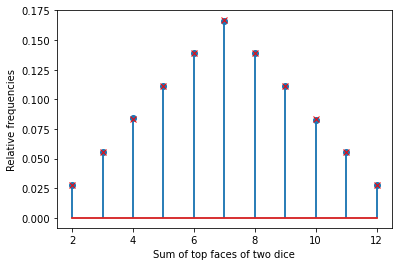

In [61]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt

die1=npr.randint(1, 7, size=1_000_000)
die2=npr.randint(1, 7, size=1_000_000)
dice=die1+die2

vals, mycounts=np.unique(dice, return_counts=True)
rel_freqs=mycounts/len(dice)

plt.stem(vals,rel_freqs, use_line_collection=True)
plt.stem(range(2,13),probs[2:13], markerfmt='rx', use_line_collection=True)


plt.xlabel("Sum of top faces of two dice")
plt.ylabel("Relative frequencies");

The relative frequencies match the true (analytical) probabilities quite closely.

**Example 2: Flipping a Fair Coin 20 Times**

Now consider flipping a fair coin 20 times and determining the probability of an outcome less than or equal to 6. Each of the 20 subexperiments has the same sample space. Using $H$ to denote heads and $T$ to denote tails, we can refer to these sample spaces as:

In [62]:
Si= ['H', 'T']

We can create an iterator for the combined sample space using `itertools.product` by passing `Si` and the keyword argument `repeat` with the number of repetitions as follows:

In [84]:
Sdice=itertools.product(Si,repeat=20)

We can count the cardinality of the sample space and the event that the number of heads is 6 or less simultaneously while looping over the outcomes in the sample space:

In [88]:
Sdice=itertools.product(Si,repeat=20)

Scount=0
Ecount=0

for s in Sdice:
    Scount+=1
    if s.count('H') <= 6:
        Ecount+=1
        
print("|E|=", Ecount, "   |S|=", Scount)

|E|= 60460    |S|= 1048576


The the probability of seeing 6 or fewer heads is:


In [92]:
print("P(6 or fewer heads)=", Ecount/Scount)

P(6 or fewer heads)= 0.057659149169921875


Compare this value with the estimated probability found via simulation in {doc}`../02-first-stats/first-stats.ipynb`. The two values are very close, so the simulation did a good job at estimating this probability (at least with 1,000,000 iterations). Note that you probably don't want to go through all 1,048,576 outcomes by hand. Moreover, if the number of coin flips increased significantly, it may be challenging to even iterate over them. This motivates us to develop mathematical methods for counting the cardinalities of sample spaces and events without enumerating them.

## Determining Cardinalities of Sample Spaces and Events Mathematically

We start with a basic result on counting in the context of sample spaces for combined experiments. If $S$ is a set that can be written as a Cartesian product,

$$
S= S_0 \times S_1  \times \ldots \times S_{K-1},
$$

then cardinality of $S$ is the product of the cardinalities of the sets in the Cartesian product:
$$
|S|= |S_0| \cdot |S_1|  \cdot \ldots \cdot |S_{K-1}|.
$$

For instance, for the Monopoly dice problem, $|S_0|=|S_1|=6$, so $|S| = |S_0| \cdot |S_1| = 6 \cdot 6 = 36$.

For flipping a fair coin 20 times, $|S_i| = 2$, and $|S| = |S_0| \cdot |S_1| \cdot \ldots \cdot |S_{19}| = 2^{20} = 1,048,576$

## THIS IS STILL IN PROGRESS